# iNeuron Assessment

In [1]:
## Python

In [198]:
def searchMatrix(matrix, target):
    if not matrix or not matrix[0]:
        return False
    
    rows = len(matrix)
    cols = len(matrix[0])
    
    row, col = 0, cols - 1
    
    while row < rows and col >= 0:
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
           
            row += 1
        else:
     
            col -= 1
            
    return False


matrix = [[1, 3, 5, 7], [10, 11, 16, 20], [23, 30, 34, 60]]
target = 3
print(searchMatrix(matrix, target))  # Output: True


True


In [73]:
def highest_frequency_word_length(s):
    words = s.split()

    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1

    max_freq = max(word_freq.values())

    max_freq_word_length = 0
    for word, freq in word_freq.items():
        if freq == max_freq:
            max_freq_word_length = max(max_freq_word_length, len(word))

    return max_freq_word_length


In [74]:
input_string = "rehan alvi rehan alvi"
print(highest_frequency_word_length(input_string))

5


## Machine Learning

In [2]:
### Import necessary Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df = pd.read_csv("instagram_reach.csv")

In [78]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [79]:
# Drop unnecessary columns
df.drop(['Unnamed: 0','S.No'],axis=1,inplace=True)

In [80]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [81]:
# Checking Null values
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [82]:
df = df.dropna()

In [83]:
df.isnull().sum()

USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [84]:
# Checking duplicate values
df.duplicated().sum()

0

In [85]:
# Describing data
df.describe()

,Followers,Likes
count,94.000000,94.000000
mean,942.627660,47.882979
std,1023.894946,56.501757
min,11.000000,8.000000
25%,231.000000,19.000000
50%,593.500000,29.500000
75%,1177.000000,46.000000
max,4496.000000,349.000000


In [86]:
# checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


In [87]:
# Shape of data
df.shape

(94, 6)

C:\Users\rehan\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


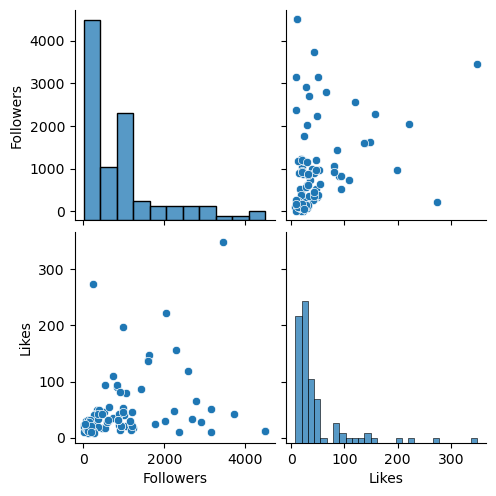

In [88]:
sns.pairplot(df)

In [89]:
df['Time since posted'] = df['Time since posted'].str.replace('hours', '').str.strip().astype(float)

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [92]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,61,86,1600,14,11.0,139
1,28,82,880,91,2.0,23
2,3,13,255,82,2.0,25
3,67,89,340,61,3.0,49
4,22,30,304,60,3.0,30


In [93]:
X = df.drop(columns=['Likes', 'Time since posted']) 
y_likes = df['Likes']  
y_time = df['Time since posted']  

In [94]:
X.dtypes

USERNAME     int32
Caption      int32
Followers    int64
Hashtags     int32
dtype: object

In [95]:
y_likes

0     139
1      23
2      25
3      49
4      30
     ... 
95     31
96     42
97     10
98    222
99    109
Name: Likes, Length: 94, dtype: int64

In [96]:
y_time

0     11.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
95     3.0
96     3.0
97     3.0
98     3.0
99     3.0
Name: Time since posted, Length: 94, dtype: float64

In [97]:
### Do train test split
from sklearn.model_selection import train_test_split

In [98]:
# Split the data into training and testing sets for the number of likes
X_train_likes, X_test_likes, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Split the data into training and testing sets for the time since posted
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X, y_time, test_size=0.2, random_state=42)


In [99]:
# Model building
from sklearn.linear_model import LinearRegression

In [100]:
model1 = LinearRegression()

In [101]:
model1.fit(X_train_likes,y_train_likes)

LinearRegression()

In [103]:
y_pred_likes = model1.predict(X_test_likes)

In [108]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [109]:
r2_score(y_test_likes, y_pred_likes)

-0.07834116123629498

In [112]:
mean_absolute_error(y_test_likes, y_pred_likes)


29.752615725938785

In [113]:
mean_squared_error(y_test_likes, y_pred_likes)

1721.2117190108947

In [115]:
model2 = LinearRegression()

In [116]:
model2.fit(X_train_time,y_train_time)

LinearRegression()

In [118]:
y_pred_time = model1.predict(X_test_time)

In [119]:
r2_score(y_test_time, y_pred_time)

-200.6377234808273

In [120]:
# model performance is worst

### Question 2

### Train an SVM regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
data.head()

In [177]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [178]:
data = data.dropna()

In [179]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [180]:
df.shape

(94, 6)

In [197]:
data.dtypes

total_sqft                 object
bath                      float64
balcony                   float64
price                     float64
area_type_Carpet  Area       bool
                           ...   
society_Zonce E              bool
society_Zostaa               bool
society_i1ncyRe              bool
society_i1odsne              bool
society_i1rtsCo              bool
Length: 3318, dtype: object

<Axes: xlabel='balcony', ylabel='price'>

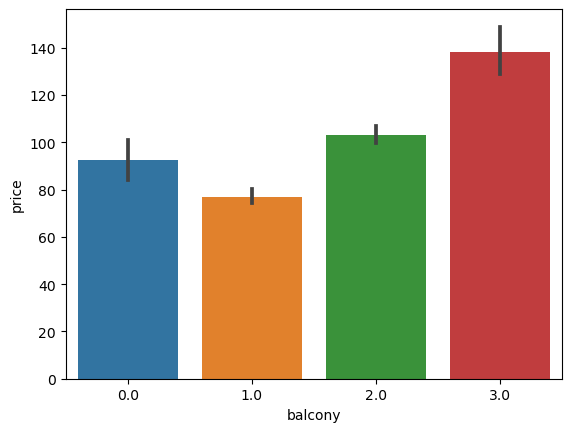

In [181]:
sns.barplot(x=data['balcony'], y=data['price'])

C:\Users\rehan\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


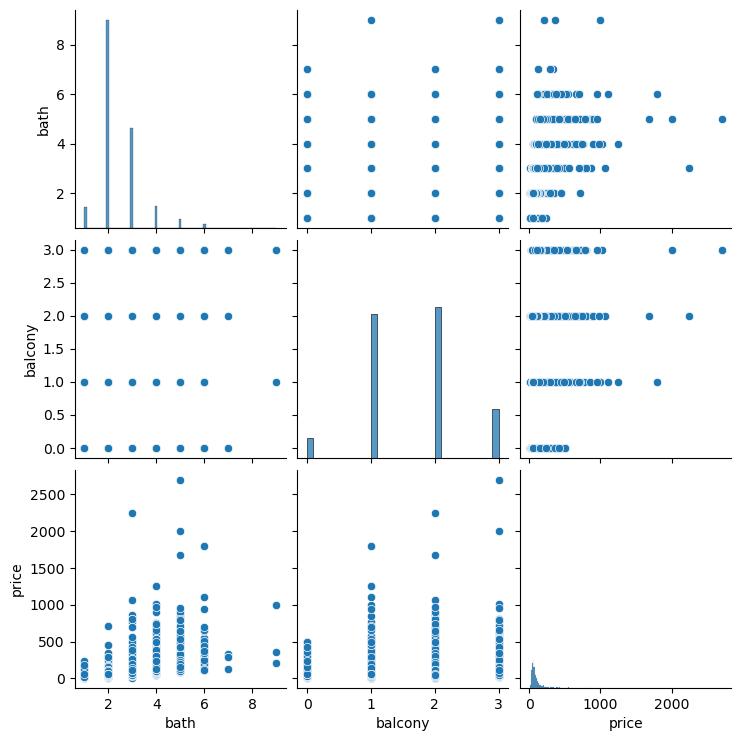

In [182]:
sns.pairplot(data)

In [183]:
X = data.drop('price',axis=1)
X

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0
...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0


In [206]:
X.drop(['area_type_Carpet  Area', 'availability'], axis=1)


KeyError: "['area_type_Carpet  Area'] not found in axis"

In [184]:
y = data.price

In [185]:
y

0         39.07
1        120.00
3         95.00
5         38.00
11       295.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13318    488.00
Name: price, Length: 7496, dtype: float64

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [188]:
X_train

,area_type,availability,location,size,society,total_sqft,bath,balcony
8121,Super built-up Area,Ready To Move,Hoskote,2 BHK,VRowsa,1095,2.0,2.0
8716,Super built-up Area,Ready To Move,Raghavendra Layout,3 BHK,Muiseek,1499,3.0,2.0
5384,Super built-up Area,Ready To Move,Yeshwanthpur,1 BHK,IBityin,670,1.0,1.0
11714,Built-up Area,Ready To Move,Allalasandra,2 BHK,Jaensa,560,2.0,1.0
11614,Super built-up Area,19-Mar,Hosa Road,3 BHK,Sosisic,1513,3.0,1.0
...,...,...,...,...,...,...,...,...
9286,Super built-up Area,Ready To Move,Tumkur Road,3 BHK,Sahtsva,1240,2.0,1.0
9340,Super built-up Area,19-Dec,Whitefield,2 BHK,Oreldhi,1350,2.0,1.0
9628,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1115,2.0,1.0
1491,Super built-up Area,Ready To Move,Yelahanka,1 BHK,Ardanru,628,1.0,1.0


dtype('O')

In [193]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_cols = ['area_type', 'availability','location','size','society']
label_encoder = LabelEncoder()
X_train_encoded = X_train.copy() 
for col in categorical_cols:
    X_train_encoded[col] = label_encoder.fit_transform(X_train[col])


scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train_encoded)


ValueError: could not convert string to float: '783 - 943'

In [ ]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train_scaled, y_train)


In [ ]:
y_pred = regr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)